<a href="https://colab.research.google.com/github/SreyaJampana/Cognitive-Distortion-Detection/blob/main/RuleBased_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Personalization' 'Labeling' 'No Distortion' 'Fortune-telling'
 'Magnification' 'Mind Reading' 'All-or-nothing thinking'
 'Overgeneralization' 'Mental filter' 'Emotional Reasoning'
 'Should statements']


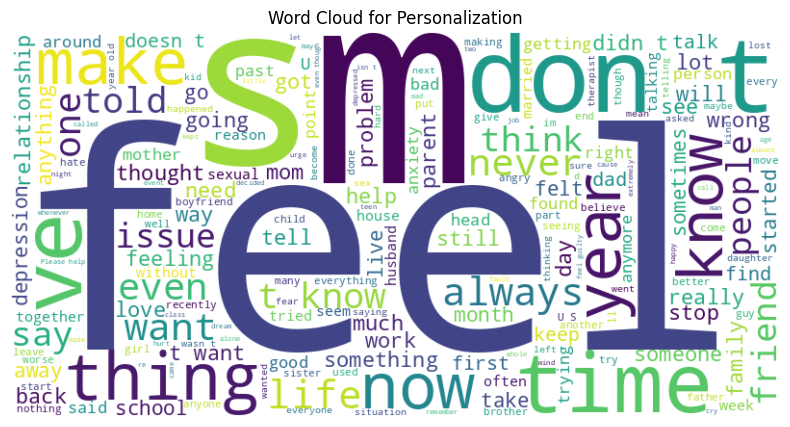

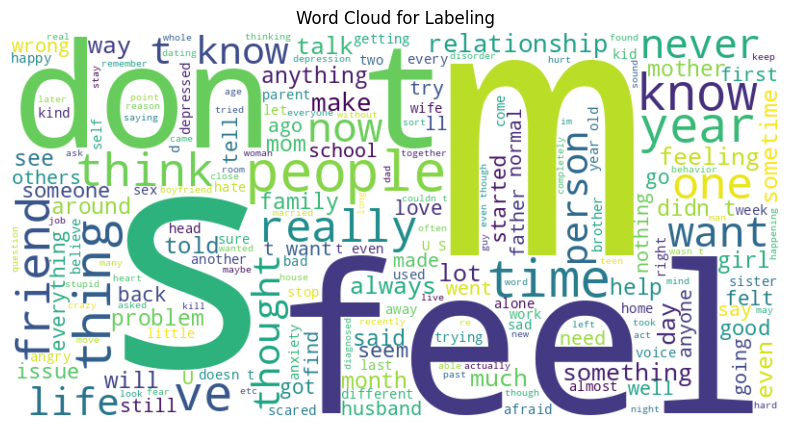

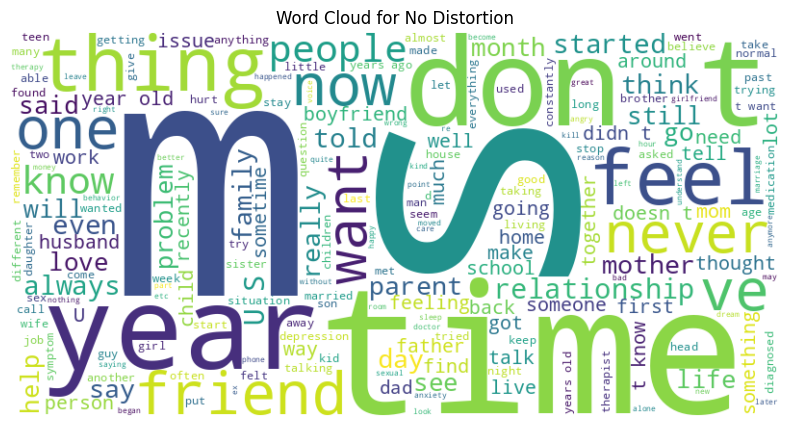

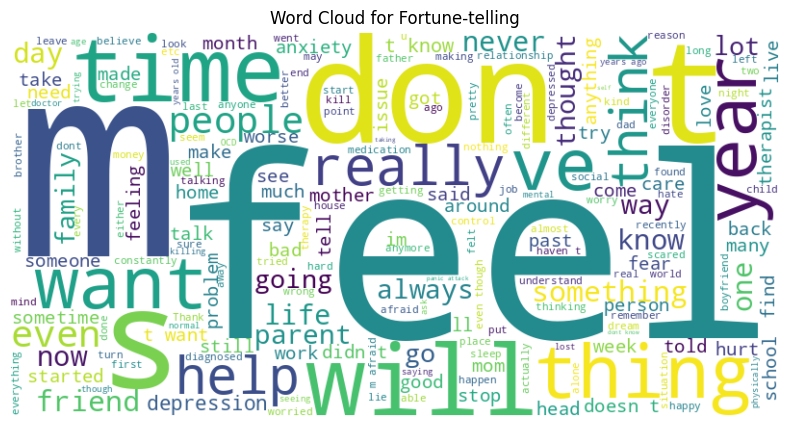

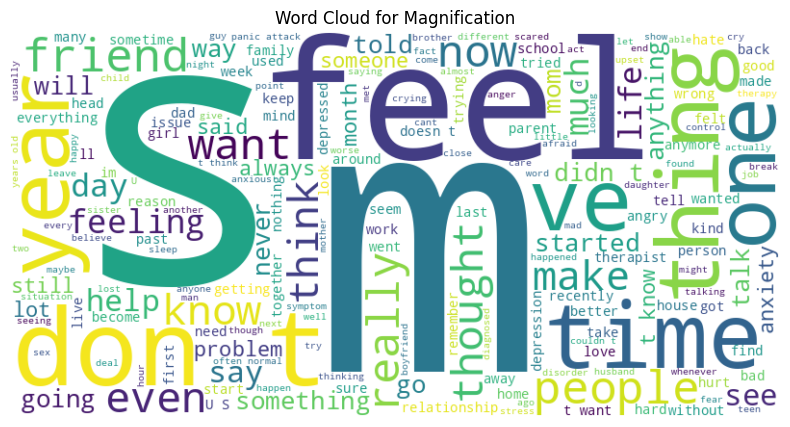

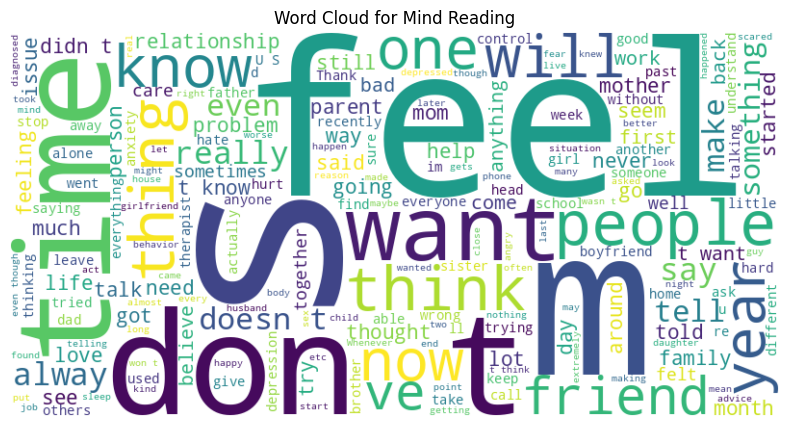

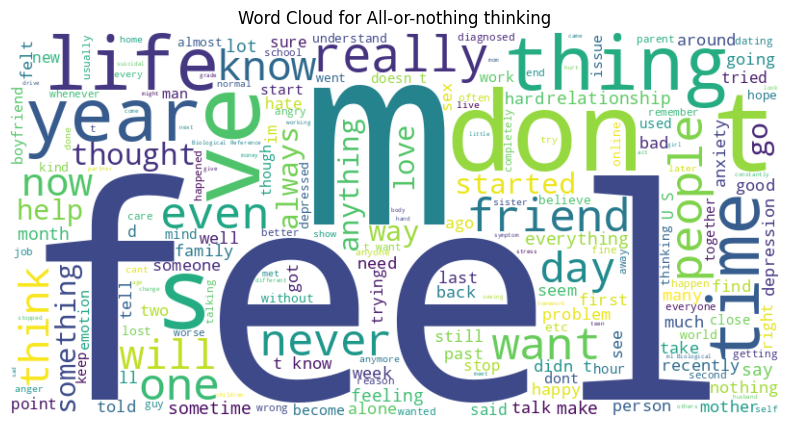

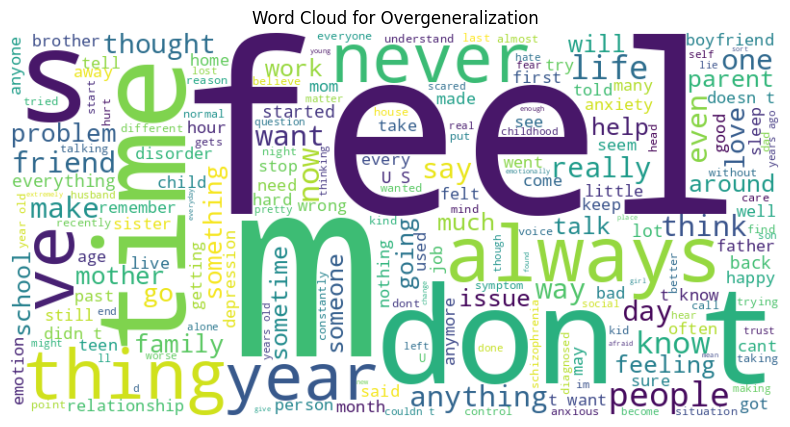

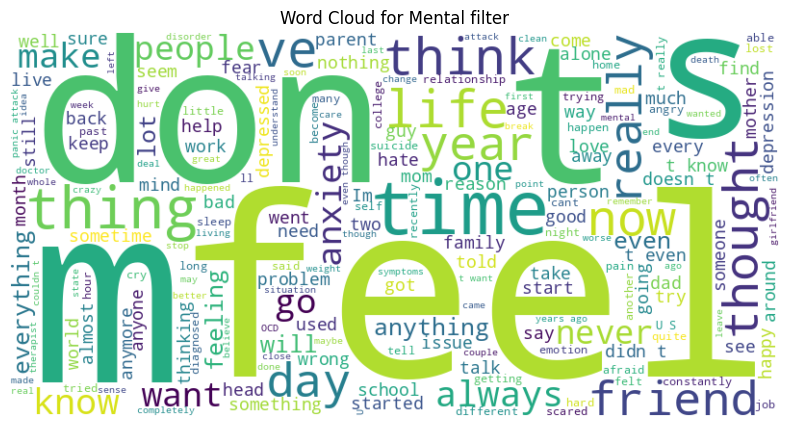

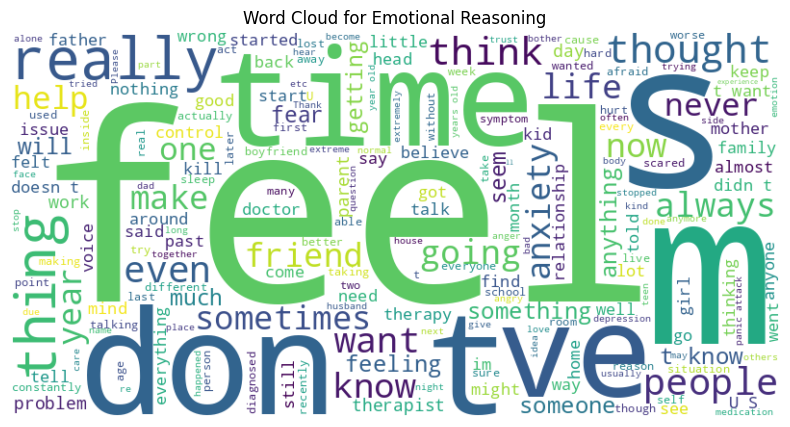

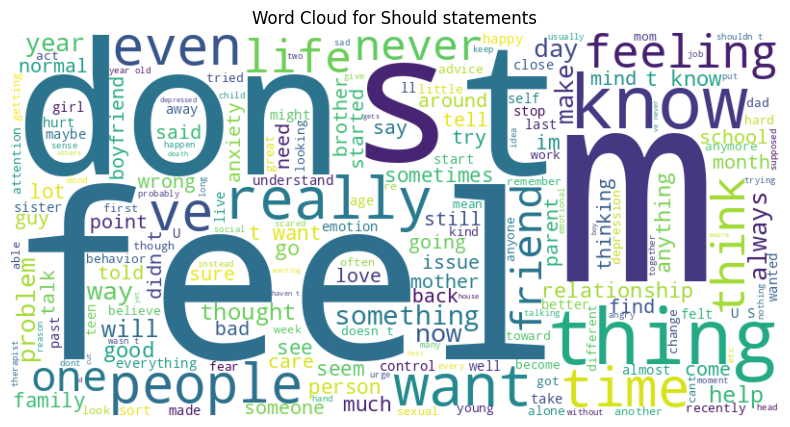

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Annotated_data.csv'

# Load dataset
df = pd.read_csv(file_path)

# Get unique cognitive distortions
cognitive_distortions = df['Dominant Distortion'].unique()

print(cognitive_distortions)

def get_frequent_words(text_data, max_words=10):
    combined_text = ' '.join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Extract the top 'max_words' most frequent words
    word_freq = wordcloud.words_  # This is a dictionary of words and their frequencies
    top_words = [word for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:max_words]]

    return top_words

# Example: Get frequent words for each cognitive distortion
cognitive_distortion_keywords = {}

# Create word clouds for each distortion
for distortion in cognitive_distortions:
    text_data = df[df['Dominant Distortion'] == distortion]['Patient Question'].values
    combined_text = ' '.join(text_data)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {distortion}')
    plt.show()

    cognitive_distortion_keywords[distortion] = get_frequent_words(text_data, max_words=10)


In [ ]:
def rule_based_classification_auto(text):
    for distortion, keywords in cognitive_distortion_keywords.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return distortion
    return 'No distortion'

# Apply the rule-based classification to your dataset
df['rule_based_prediction'] = df['Patient Question'].apply(rule_based_classification_auto)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'cognitive_distortion' is the true label column
X_train, X_test, y_train, y_test = train_test_split(df['Patient Question'], df['Dominant Distortion'], test_size=0.2, random_state=42)

In [ ]:
y_pred = X_test.apply(rule_based_classification_auto)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get a full classification report with precision, recall, F1 score for each class (cognitive distortion)
print(classification_report(y_test, y_pred))

Accuracy: 0.06
                         precision    recall  f1-score   support

All-or-nothing thinking       0.00      0.00      0.00        28
    Emotional Reasoning       0.00      0.00      0.00        28
        Fortune-telling       0.00      0.00      0.00        31
               Labeling       0.00      0.00      0.00        27
          Magnification       0.00      0.00      0.00        43
          Mental filter       0.00      0.00      0.00        30
           Mind Reading       0.00      0.00      0.00        47
          No Distortion       0.00      0.00      0.00       175
     Overgeneralization       0.00      0.00      0.00        46
        Personalization       0.06      1.00      0.12        32
      Should statements       0.00      0.00      0.00        19

               accuracy                           0.06       506
              macro avg       0.01      0.09      0.01       506
           weighted avg       0.00      0.06      0.01       506



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
